# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# loading dataset
df=pd.read_csv("Telco-Customer-Churn.csv")

In [7]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(data, threshold=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    return (data < lower_bound) | (data > upper_bound)

In [9]:
# Apply outlier detection
outlier_mask = df[numerical_cols].apply(detect_outliers_iqr)

# Count outliers per column
outlier_counts = outlier_mask.sum()
print("Outlier counts per column:")
print(outlier_counts)

Outlier counts per column:
SeniorCitizen     1142
tenure               0
MonthlyCharges       0
dtype: int64


In [11]:
# Remove outliers by capping values within IQR bounds
def cap_outliers(data, threshold=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    return np.clip(data, lower_bound, upper_bound)

# Apply capping
for col in numerical_cols:
    df[col] = cap_outliers(df[col])

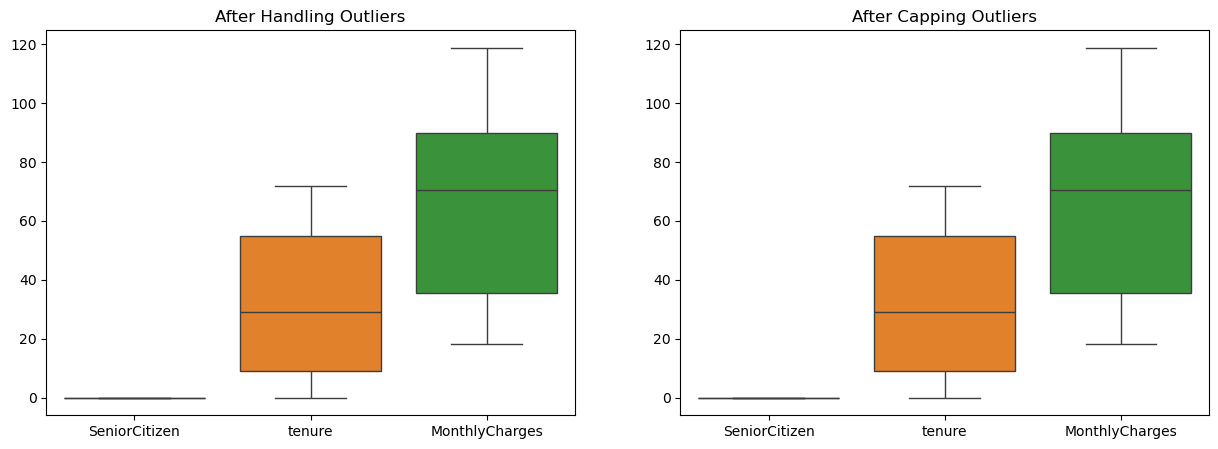

In [13]:
# Visualize distribution before and after handling outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df[numerical_cols], ax=axes[0])
axes[0].set_title("After Handling Outliers")

sns.boxplot(data=df[numerical_cols].apply(cap_outliers), ax=axes[1])
axes[1].set_title("After Capping Outliers")

plt.show()